In [59]:
import pandas as pd
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import des données

In [33]:
apple = pd.read_csv("../data/AAPL.csv")
amazon = pd.read_csv("../data/AMZN.csv")
berkshire = pd.read_csv("../data/BRK-B.csv")
google = pd.read_csv("../data/GOOG.csv")
meta = pd.read_csv("../data/META.csv")
microsoft = pd.read_csv("../data/MSFT.csv")
nvidia = pd.read_csv("../data/NVDA.csv")
tesla = pd.read_csv("../data/TSLA.csv")
unitedhealth = pd.read_csv("../data/UNH.csv")
exxon = pd.read_csv("../data/XOM.csv")

In [34]:
titres = [apple, amazon, berkshire, google, meta, microsoft, nvidia,
          tesla, unitedhealth, exxon]

In [42]:
def preprocess_timeseries(element):
    element["Date"] = pd.to_datetime(element["Date"])
    element = element[["Date","Close"]]
    element.set_index("Date", inplace = True)
    
    return(element)

In [43]:
for i in range(len(titres)) : 
    titres[i] = preprocess_timeseries(titres[i])

In [47]:
apple, amazon, berkshire, google, meta, microsoft, nvidia, tesla, unitedhealth, exxon = titres

# Création du portefeuille

In [50]:
for i in range(len(titres)):
    titres[i]['Return'] = titres[i]['Close'].pct_change()

# Créer un DataFrame pour les rendements du portefeuille
portfolio_returns = pd.DataFrame()

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_1449/1135258606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titres[i]['Return'] = titres[i]['Close'].pct_change()
/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_1449/1135258606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titres[i]['Return'] = titres[i]['Close'].pct_change()


In [51]:
for i in range(len(titres)):
    portfolio_returns[i] = titres[i]['Return']

portfolio_returns['Portfolio'] = portfolio_returns.mean(axis=1)

In [53]:
initial_capital = 1000

portfolio_returns['Portfolio Value'] = initial_capital * (1 + portfolio_returns['Portfolio']).cumprod()
portfolio_returns = portfolio_returns.iloc[1:]
print(portfolio_returns.head())

                   0         1         2         3         4         5  \
Date                                                                     
2013-01-03 -0.012622  0.004547  0.004507  0.000581 -0.008214 -0.013396   
2013-01-04 -0.027855  0.002592  0.002457  0.019760  0.035650 -0.018716   
2013-01-07 -0.005882  0.035925 -0.004262 -0.004363  0.022949 -0.001870   
2013-01-08  0.002691 -0.007748  0.003852 -0.001974 -0.012237 -0.005245   
2013-01-09 -0.015629 -0.000113 -0.005223  0.006573  0.052650  0.005650   

                   6         7         8         9  Portfolio  Portfolio Value  
Date                                                                            
2013-01-03  0.000786 -0.016685 -0.046755 -0.001804  -0.008906       991.094425  
2013-01-04  0.032993 -0.010642  0.001923  0.004630   0.004279       995.335697  
2013-01-07 -0.028897 -0.001744  0.000000 -0.011578   0.000028       995.363207  
2013-01-08 -0.021926 -0.019220 -0.013246  0.006255  -0.006880       988.5153

In [56]:
fig = go.Figure()

# Ajout de la série financière
fig.add_trace(go.Scatter(x = portfolio_returns.index, 
                         y = portfolio_returns['Portfolio'], 
                         mode = 'lines',
                         name ='Évolution financière ptf', 
                         fill = "tozeroy"))

# Mise à jour des titres
fig.update_layout(title="Évolution de la valeur de ptf",
                  xaxis_title='Date',
                  yaxis_title='Valeur')

# Affichage du graphique
fig.show()

# Modélisation ARIMA
## Paramètres

<Figure size 640x480 with 0 Axes>

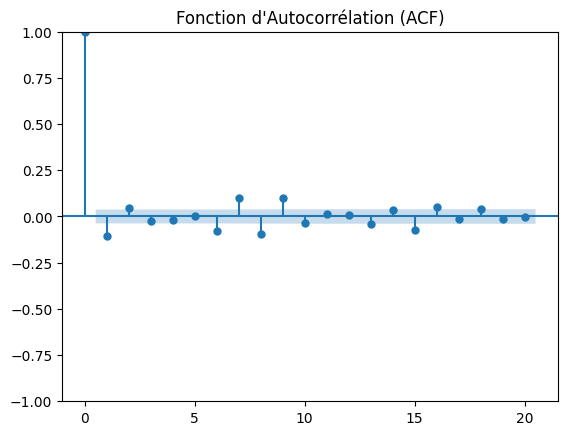

<Figure size 640x480 with 0 Axes>

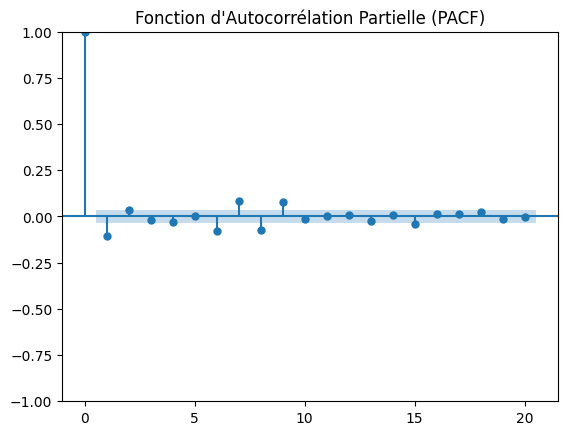

In [58]:
plt.figure()
plot_acf(portfolio_returns["Portfolio"], lags=20)
plt.title('Fonction d\'Autocorrélation (ACF)')

# Tracer PACF
plt.figure()
plot_pacf(portfolio_returns["Portfolio"], lags=20)
plt.title('Fonction d\'Autocorrélation Partielle (PACF)')
plt.show()

## Modélisation

In [60]:
temp = portfolio_returns["Portfolio"]

In [61]:
window_size = 60 
predictions = []

for end in range(window_size, len(temp)):
    train_data = temp.iloc[end-window_size:end]

    model = ARIMA(train_data, order=(2,1,0))  
    model_fit = model.fit()

    pred = model_fit.forecast()
    predictions.append(pred.values[0])

predicted_dates = temp.index[window_size:]
predictions_series = pd.Series(predictions, index=predicted_dates)

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is avai

In [64]:
fig = go.Figure()

# Ajouter les valeurs réelles
fig.add_trace(go.Scatter(x = temp.index, y=temp, mode='lines', name='Valeurs Réelles'))

# Ajouter les prédictions
fig.add_trace(go.Scatter(x = predicted_dates, y = predictions_series, mode='lines', name='Prédictions ARIMA'))

# Mise à jour des titres et layout
fig.update_layout(title='Prédictions ARIMA avec Fenêtre Glissante de 2 Mois',
                  xaxis_title='Date',
                  yaxis_title='Prix de l\'Action')

# Affichage du graphique
fig.show()